In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [2]:
file_path = "pca_data.txt"
data = pd.read_csv(file_path, sep=" ", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.155775,0.381507,-0.279649,-0.000460,0.235760,0.099413,0.191627,-0.234799,-0.277084,-0.256816,...,0.198208,-0.108410,0.282201,0.018984,-0.065207,-0.261575,0.192196,-0.336263,0.522141,-0.128443
1,-0.251573,-0.628688,0.230546,-0.114202,-0.072775,-0.173779,-0.547126,0.568795,0.426364,0.498217,...,-0.218147,0.100109,-0.411944,-0.260310,0.294739,0.307606,-0.341360,0.658771,-0.478646,-0.066997
2,0.124066,0.162434,-0.095924,0.034273,0.015838,0.084490,0.187087,-0.278141,-0.210675,-0.221103,...,0.092230,-0.099903,0.203037,0.073097,-0.111699,-0.159445,0.205872,-0.207548,0.240711,0.023992
3,-0.120867,-0.567739,0.718017,0.140543,-0.271570,-0.106894,0.066101,0.187712,0.476221,0.385029,...,-0.130982,0.238062,-0.358473,-0.000900,-0.021684,0.453723,-0.302631,0.326444,-0.700710,0.248158
4,-0.213244,-0.531256,0.426536,-0.119300,-0.148670,-0.140656,-0.336820,0.415726,0.332347,0.363652,...,-0.160723,0.091573,-0.449260,-0.167912,0.103604,0.388201,-0.235169,0.624286,-0.548435,0.028180


In [4]:
data.shape

(1000, 500)

In [5]:
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
standardized_data = (data - data_mean) / data_std
standardized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.451895,2.034444,-1.561859,-0.275464,1.680528,1.716869,0.931296,-1.632937,-1.954741,-1.859824,...,2.390162,-1.939756,2.176183,0.419274,-1.274065,-1.856729,1.806946,-1.744109,2.156791,-1.218556
1,-1.428529,-1.166072,-0.022828,-1.162637,0.221486,-1.010970,-1.601245,1.532993,0.933432,1.262539,...,-1.146458,0.538631,-1.316145,-1.419770,2.509627,0.417996,-0.975663,1.276239,-0.417875,-0.827193
2,1.227675,1.340373,-1.007642,-0.004554,0.640529,1.567854,0.915729,-1.803691,-1.682081,-1.712139,...,1.489965,-1.838646,1.777898,0.775589,-1.762774,-1.448569,1.878266,-1.353407,1.432772,-0.247668
3,-0.504289,-0.972972,1.447655,0.824341,-0.718600,-0.343115,0.500977,0.031635,1.138133,0.794462,...,-0.406054,2.178295,-1.047123,0.288347,-0.816553,1.001952,-0.773682,0.267484,-0.989166,1.180099
4,-1.157501,-0.857388,0.568386,-1.202399,-0.137414,-0.680237,-0.880288,0.929943,0.547422,0.706059,...,-0.658681,0.437179,-1.503885,-0.811368,0.500455,0.740094,-0.421851,1.171561,-0.597419,-0.220994


In [6]:
cov_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [7]:
top_eigenvectors = eigenvectors[:, :2]
pca_projected_data = np.dot(standardized_data, top_eigenvectors)


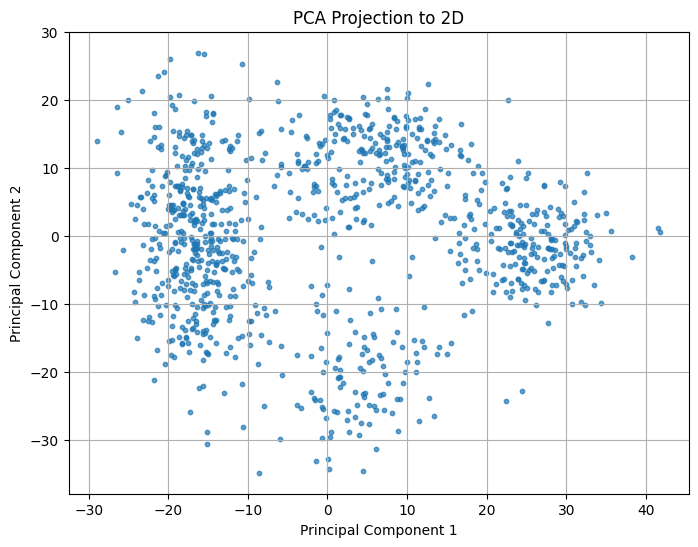

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_projected_data[:, 0], pca_projected_data[:, 1], alpha=0.7, s=10)
plt.title("PCA Projection to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


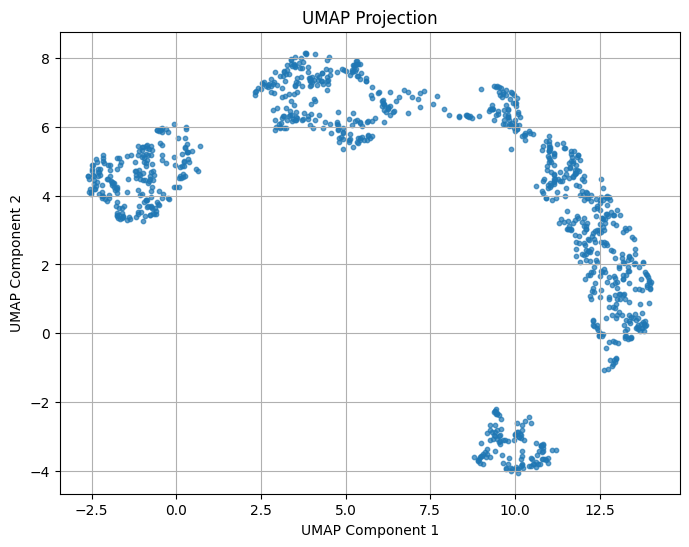

In [9]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(standardized_data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.7, s=10)
plt.title("UMAP Projection")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.show()

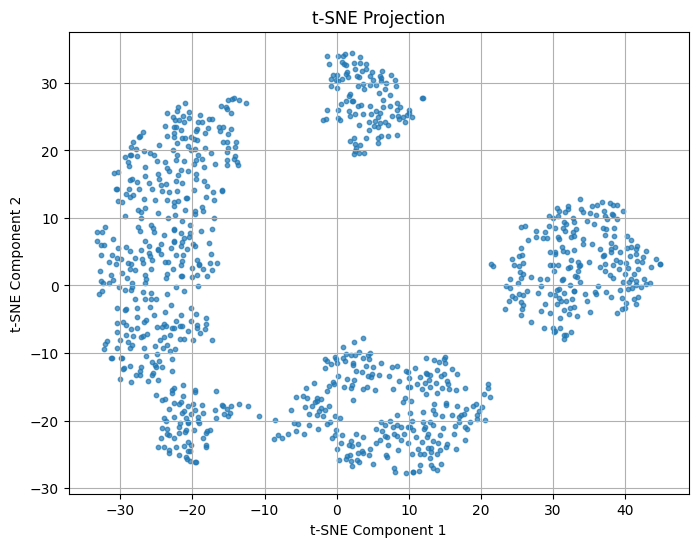

In [10]:
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(standardized_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], alpha=0.7, s=10)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.show()